In [2]:
import pandas as pd
df_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\2- U20 WC defensive stats.xlsx"
df = pd.read_excel(df_path)
print(df)

            Player              Team          Position   Age  Matches played   
0     B. Cremaschi             Parma        RCMF, LCMF  20.0               5  \
1    N. Villarreal       Millonarios                CF  20.0               6   
2        L. Michal            Monaco                CF  20.0               7   
3        Y. Zabiri     Famalicão U23                CF  20.0               6   
4         A. Sarco  Bayer Leverkusen                CF  19.0               6   
..             ...               ...               ...   ...             ...   
455     J. Arizala      Medellín U20                LB  20.0               7   
456       I. Toure       Monaco  U19  RCMF, RAMF, RDMF  19.0               7   
457      L. Olmeta            Bastia                GK  20.0               6   
458      M. Benama            Annecy        LDMF, LCMF  20.0               6   
459      J. Bengui     RWD Molenbeek                GK  20.0               1   

     Minutes played  Successful defensi

The defensive stats for top 20 defenders at FIFA U20 World Cup Chile 2025

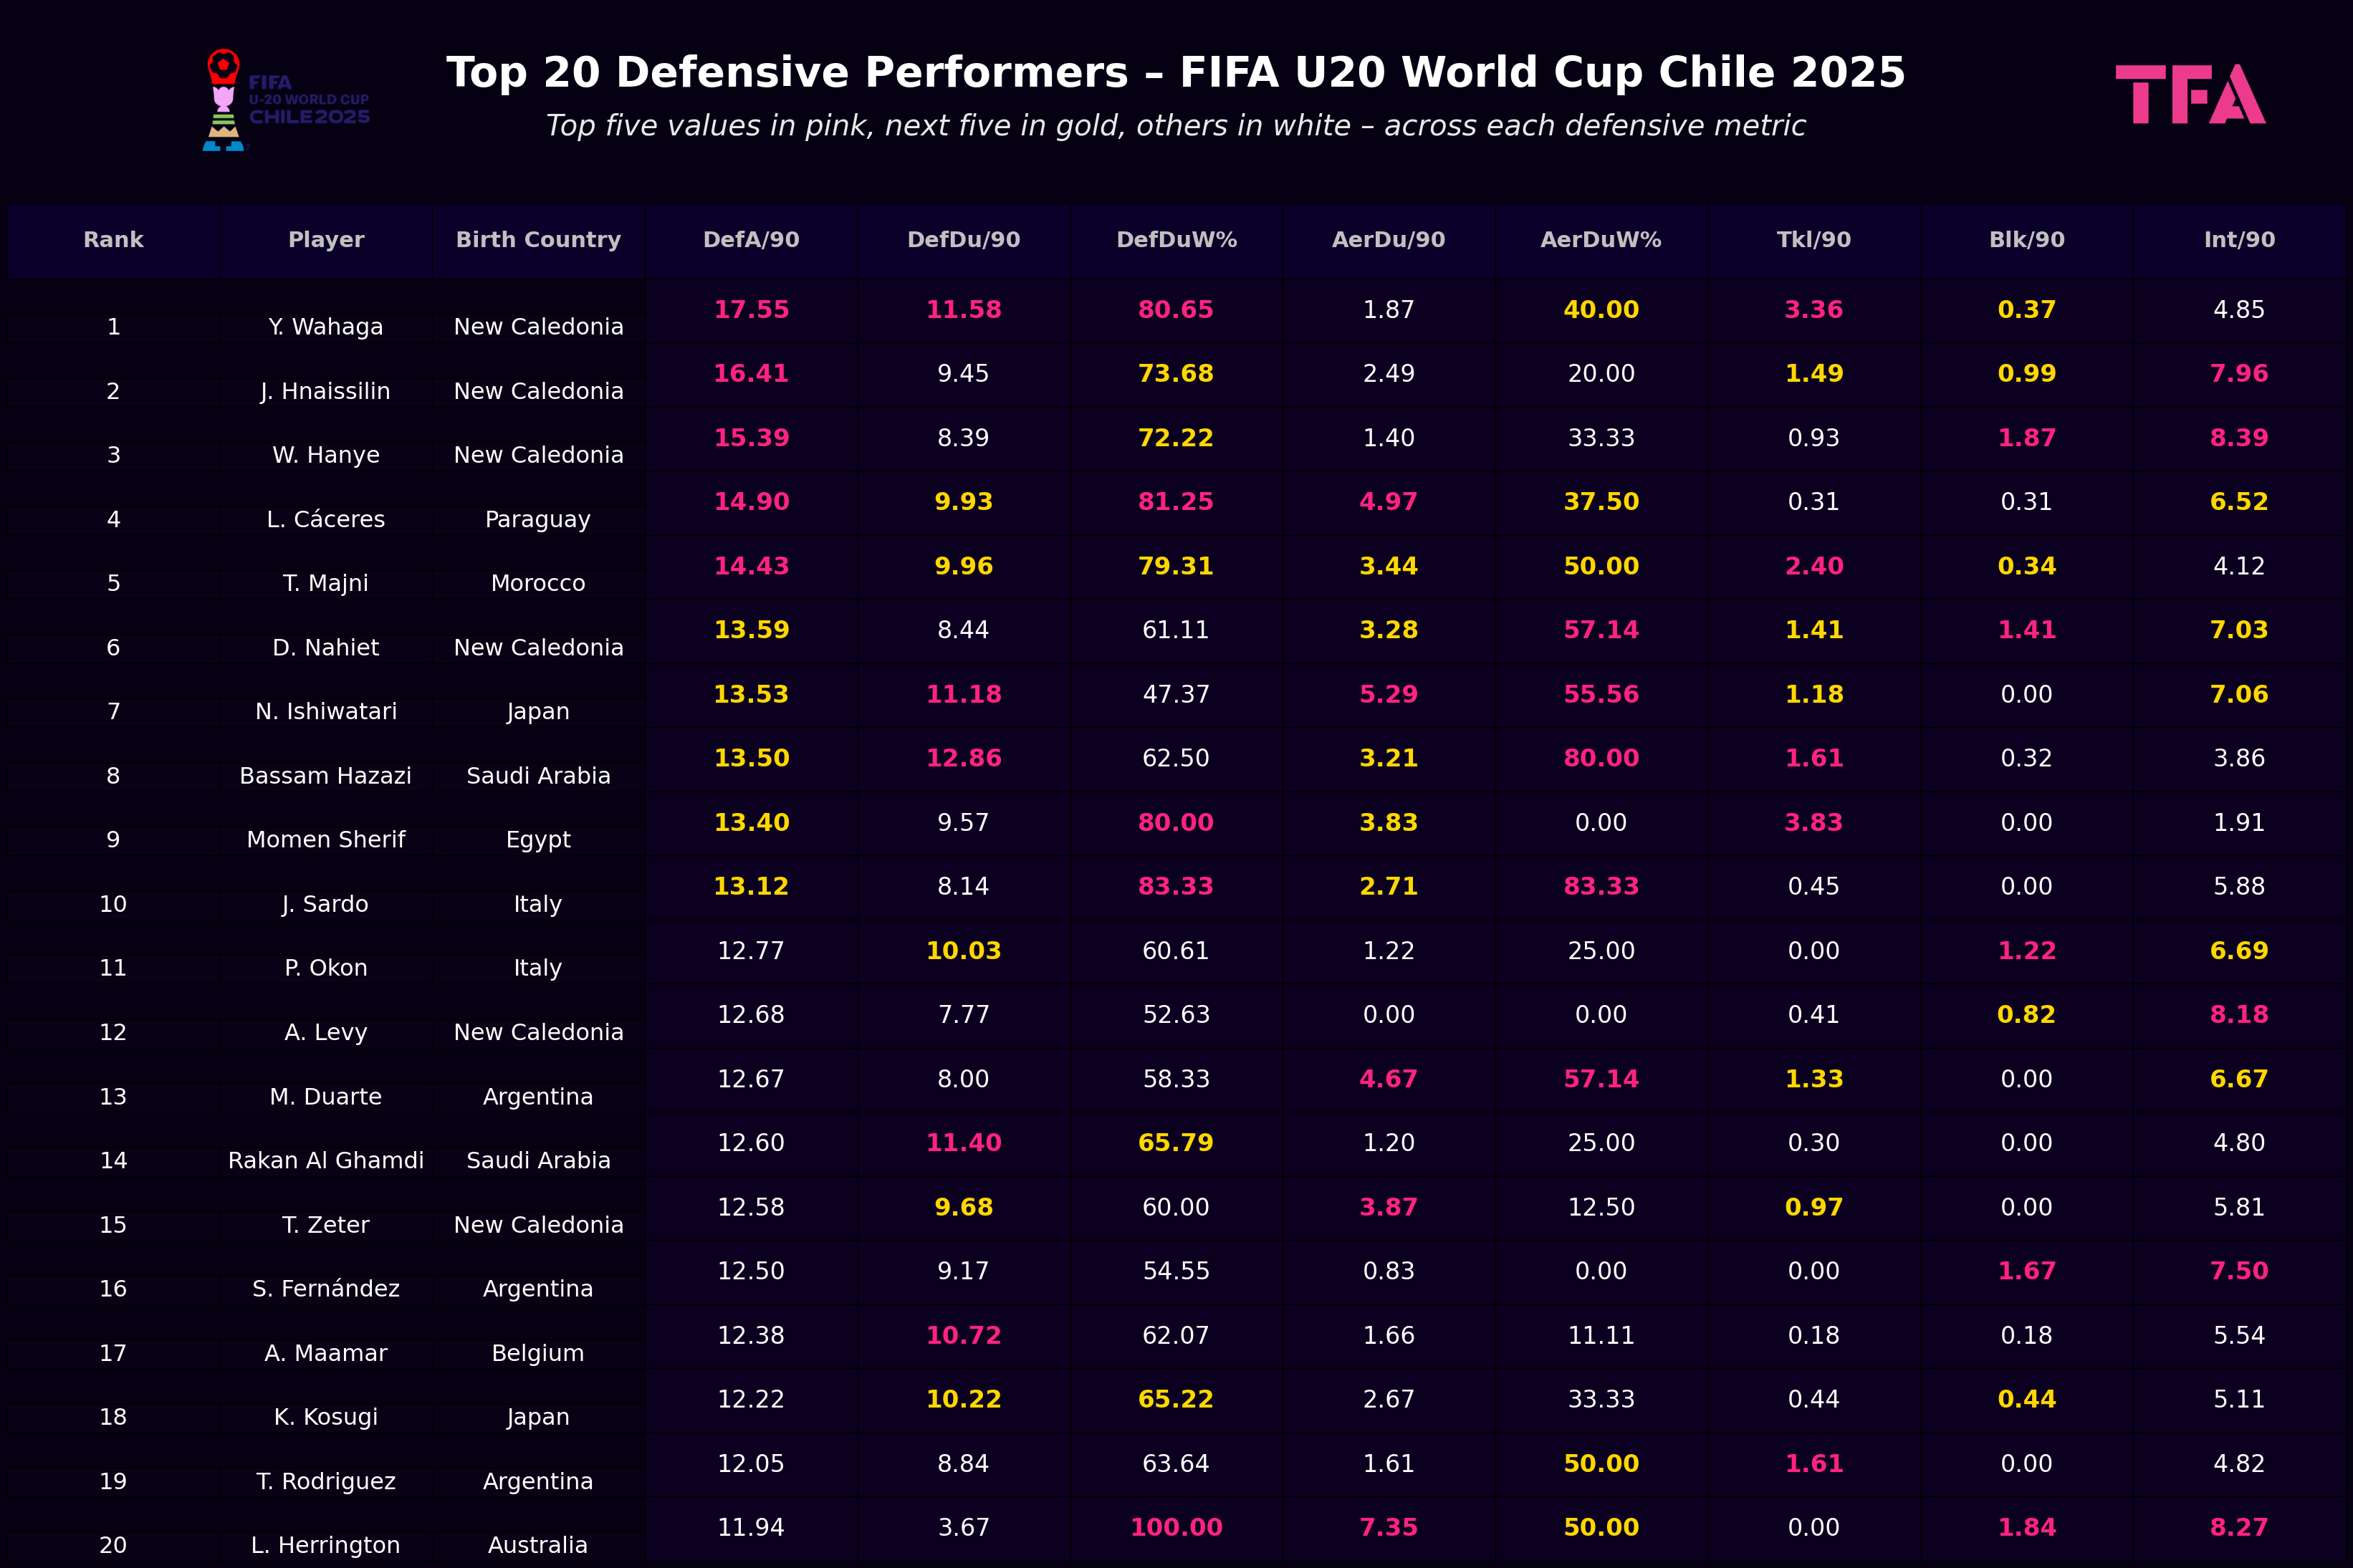

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
from PIL import Image

def_path_def = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\2- U20 WC defensive stats.xlsx"
gen_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\1- U20 WC general stats.xlsx"

df_def = pd.read_excel(def_path_def)
df_gen = pd.read_excel(gen_path)

df = pd.merge(df_def, df_gen[["Player", "Birth country"]], on="Player", how="left")
df["Birth country"] = df["Birth country"].fillna("Unknown")

df_top = df.sort_values(by=["Successful defensive actions per 90", "Matches played"], ascending=False).head(20)

cols = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Shots blocked per 90",
    "Interceptions per 90"
]

col_short = {
    "Successful defensive actions per 90": "DefA/90",
    "Defensive duels per 90": "DefDu/90",
    "Defensive duels won, %": "DefDuW%",
    "Aerial duels per 90": "AerDu/90",
    "Aerial duels won, %": "AerDuW%",
    "Sliding tackles per 90": "Tkl/90",
    "Shots blocked per 90": "Blk/90",
    "Interceptions per 90": "Int/90"
}

fig, ax = plt.subplots(figsize=(20, 13))
fig.patch.set_facecolor("#060013")
ax.set_facecolor("#090116")
ax.axis("off")

headers = ["Rank", "Player", "Birth Country"] + [col_short[c] for c in cols]
table_data = []

for i, (_, row) in enumerate(df_top.iterrows(), start=1):
    row_data = [i, row["Player"], row["Birth country"]] + [f"{row[c]:.2f}" for c in cols]
    table_data.append(row_data)

table = ax.table(cellText=table_data, colLabels=headers, loc="center", cellLoc="center", colColours=["#1A0033"] * len(headers))
table.auto_set_font_size(False)
table.set_fontsize(22)
table.scale(1.7, 2.3)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(color="#C0C0C0", fontweight="bold", ha='center')
        cell.set_facecolor("#0A002A")
        cell.set_height(0.1)
    elif col in [0, 1, 2]:
        cell.set_facecolor("#090116")
        cell.set_text_props(color="white", fontsize=23)
    else:
        try:
            col_name = cols[col - 3]  
            values_sorted = df_top[col_name].sort_values(ascending=False).reset_index(drop=True)
            val = float(cell.get_text().get_text())
            if val in values_sorted[:5].values:
                cell.set_text_props(color="#FF237F", fontweight="bold", fontsize=24.5)
            elif val in values_sorted[5:10].values:
                cell.set_text_props(color="#FFD700", fontweight="bold", fontsize=24.5)
            else:
                cell.set_text_props(color="white", fontsize=24)
            cell.set_facecolor("#0C0020")
            cell.set_height(0.085)
        except:
            cell.set_facecolor("#090116")

plt.subplots_adjust(left=0.02, right=0.98, top=0.86, bottom=0.05)

plt.suptitle(" \nTop 20 Defensive Performers – FIFA U20 World Cup Chile 2025", color='white', fontsize=42, weight='bold', y=1.395)
plt.text(0.5, 1.266, "Top five values in pink, next five in gold, others in white – across each defensive metric",
         ha='center', va='center', transform=fig.transFigure, color='#E8E8E8', fontsize=29, style='italic')

fifa_logo_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\Main Files\fifa-u-20-world-cup-chile-2025-logo.png"
if os.path.exists(fifa_logo_path):
    fifa_img = Image.open(fifa_logo_path).convert("RGBA")
    fifa_img = fifa_img.resize((int(fifa_img.width * 0.81), int(fifa_img.height * 0.81)))
    fig.figimage(fifa_img, xo=270, yo=1920, alpha=0.98, zorder=10)

tfa_logo_path = r"D:\Work\Data Analysis TFA\06 How Ancelotti Could Reshape Brazil\logos\TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path).convert("RGBA")
    tfa_img = tfa_img.resize((int(tfa_img.width * 0.69), int(tfa_img.height * 0.69)))
    fig.figimage(tfa_img, xo=2920, yo=1920, alpha=0.97, zorder=10)

plt.show()

Top 20 Defensive Performers – FIFA U20 World Cup Chile 2025

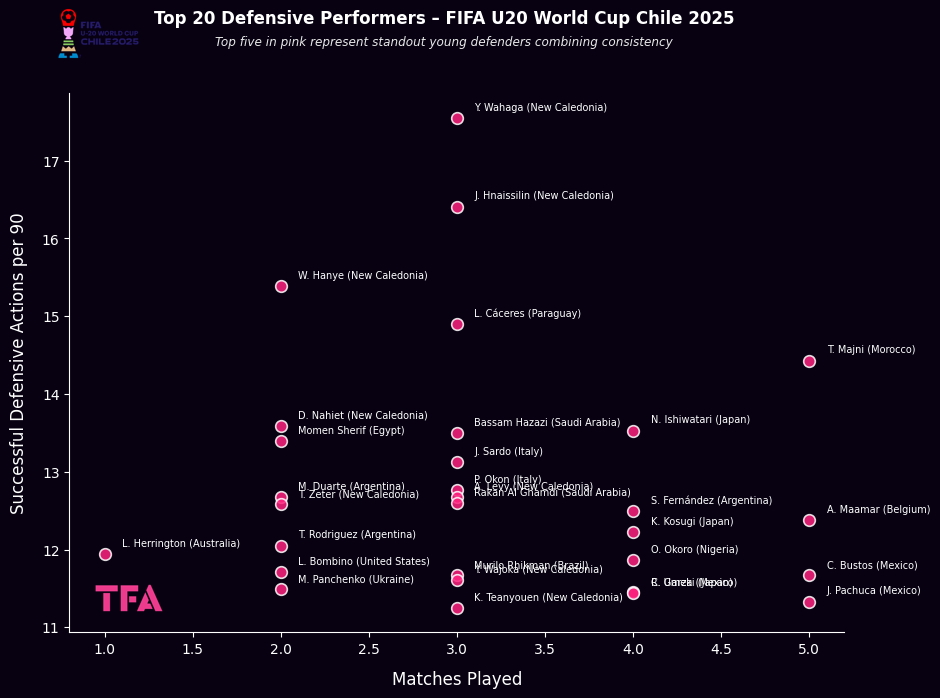

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

def_path_def = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\2- U20 WC defensive stats.xlsx"
gen_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\1- U20 WC general stats.xlsx"

df_def = pd.read_excel(def_path_def)
df_gen = pd.read_excel(gen_path)

df = pd.merge(df_def, df_gen[["Player", "Birth country"]], on="Player", how="left")
df["Birth country"] = df["Birth country"].fillna("Unknown")

df_top = df.sort_values(by=["Successful defensive actions per 90", "Matches played"], ascending=False).head(30)

fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor("#070111")
ax.set_facecolor("#070111")

highlight_color = "#FF237F"
default_color = "#FF237F"

for i, row in df_top.iterrows():
    color = highlight_color if i < 5 else default_color
    size = 180 if i < 5 else 70
    ax.scatter(row["Matches played"], row["Successful defensive actions per 90"],
               s=size, color=color, alpha=0.85, edgecolors='white', linewidth=1.2, zorder=3)

ax.set_xlabel("Matches Played", color='white', fontsize=12, labelpad=10)
ax.set_ylabel("Successful Defensive Actions per 90", color='white', fontsize=12, labelpad=10)
ax.tick_params(colors='white', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

for i, row in df_top.iterrows():
    color = highlight_color if i < 5 else 'white'
    fontsize = 9 if i < 5 else 7
    ax.text(row["Matches played"] + 0.1, row["Successful defensive actions per 90"] + 0.1,
            f"{row['Player']} ({row['Birth country']})", color=color, fontsize=fontsize,
            fontweight='bold' if i < 5 else 'normal')

plt.suptitle("Top 20 Defensive Performers – FIFA U20 World Cup Chile 2025", color='white', fontsize=12, weight='bold', y=1.00)
plt.text(0.5, 0.954, "Top five in pink represent standout young defenders combining consistency",
         ha='center', va='center', transform=fig.transFigure, color='#E8E8E8', fontsize=8.61, style='italic')

fifa_logo_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\Main Files\fifa-u-20-world-cup-chile-2025-logo.png"
if os.path.exists(fifa_logo_path):
    fifa_img = Image.open(fifa_logo_path).convert("RGBA")
    fifa_img = fifa_img.resize((int(fifa_img.width * 0.28), int(fifa_img.height * 0.28)))
    fig.figimage(fifa_img, xo=54, yo=620, alpha=0.98, zorder=10)

tfa_logo_path = r"D:\Work\Data Analysis TFA\06 How Ancelotti Could Reshape Brazil\logos\TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path).convert("RGBA")
    tfa_img = tfa_img.resize((int(tfa_img.width * 0.220), int(tfa_img.height * 0.220)))
    fig.figimage(tfa_img, xo=85, yo=56, alpha=0.97, zorder=10)

plt.show()

Top 20 Attacking Performers At FIFA U20 World Cup Chile 2025

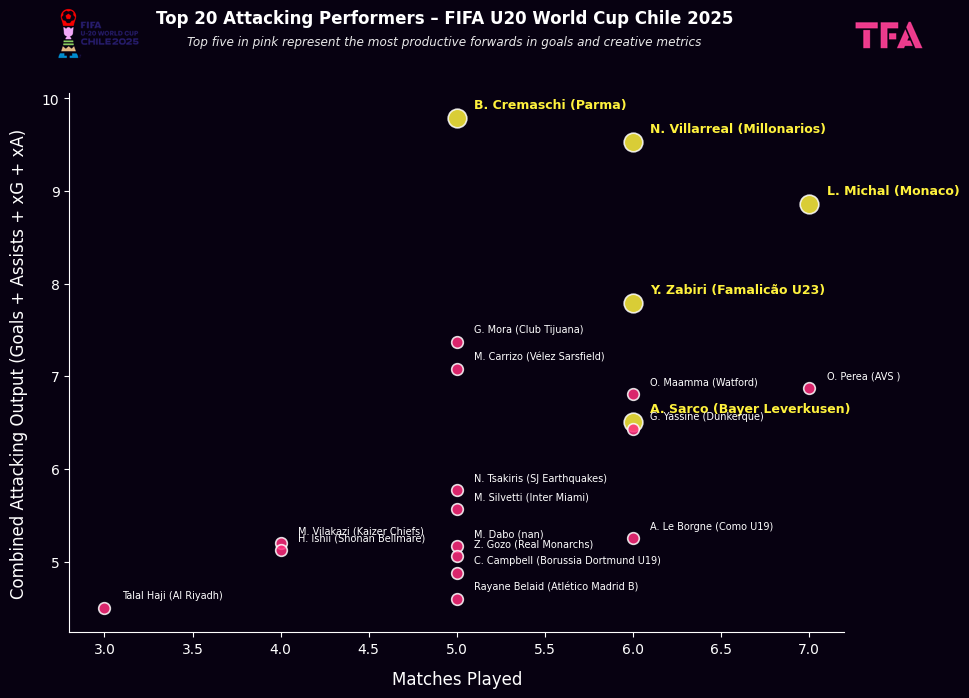

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

att_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\3- U20 WC attacking stats.xlsx"
gen_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\1- U20 WC general stats.xlsx"

df_att = pd.read_excel(att_path)
df_gen = pd.read_excel(gen_path)

df = pd.merge(df_att, df_gen[["Player", "Birth country"]], on="Player", how="left")
df["Birth country"] = df["Birth country"].fillna("Unknown")

df["Total Score"] = df["Goals"] + df["Assists"] + df["xA"] + df["xG"]
df_top = df.sort_values(by=["Total Score", "Matches played"], ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor("#070111")
ax.set_facecolor("#070111")

highlight_color = "#FFF23D"
default_color = "#FF2D7D"

for i, row in df_top.iterrows():
    color = highlight_color if i < 5 else default_color
    size = 180 if i < 5 else 70
    ax.scatter(row["Matches played"], row["Total Score"],
               s=size, color=color, alpha=0.85, edgecolors='white', linewidth=1.2, zorder=3)

ax.set_xlabel("Matches Played", color='white', fontsize=12, labelpad=10)
ax.set_ylabel("Combined Attacking Output (Goals + Assists + xG + xA)", color='white', fontsize=12, labelpad=10)
ax.tick_params(colors='white', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

for i, row in df_top.iterrows():
    color = highlight_color if i < 5 else 'white'
    fontsize = 9 if i < 5 else 7
    ax.text(row["Matches played"] + 0.1, row["Total Score"] + 0.1,
            f"{row['Player']} ({row['Team']})", color=color, fontsize=fontsize,
            fontweight='bold' if i < 5 else 'normal')

plt.suptitle("Top 20 Attacking Performers – FIFA U20 World Cup Chile 2025", color='white', fontsize=12, weight='bold', y=1.00)
plt.text(0.5, 0.954, "Top five in pink represent the most productive forwards in goals and creative metrics",
         ha='center', va='center', transform=fig.transFigure, color='#E8E8E8', fontsize=8.61, style='italic')

fifa_logo_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\Main Files\fifa-u-20-world-cup-chile-2025-logo.png"
if os.path.exists(fifa_logo_path):
    fifa_img = Image.open(fifa_logo_path).convert("RGBA")
    fifa_img = fifa_img.resize((int(fifa_img.width * 0.28), int(fifa_img.height * 0.28)))
    fig.figimage(fifa_img, xo=54, yo=620, alpha=0.98, zorder=10)

tfa_logo_path = r"D:\Work\Data Analysis TFA\06 How Ancelotti Could Reshape Brazil\logos\TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path).convert("RGBA")
    tfa_img = tfa_img.resize((int(tfa_img.width * 0.220), int(tfa_img.height * 0.220)))
    fig.figimage(tfa_img, xo=845, yo=619, alpha=0.97, zorder=10)

plt.show()


The Offensive stats for top 20 attackers at FIFA U20 World Cup Chile 2025

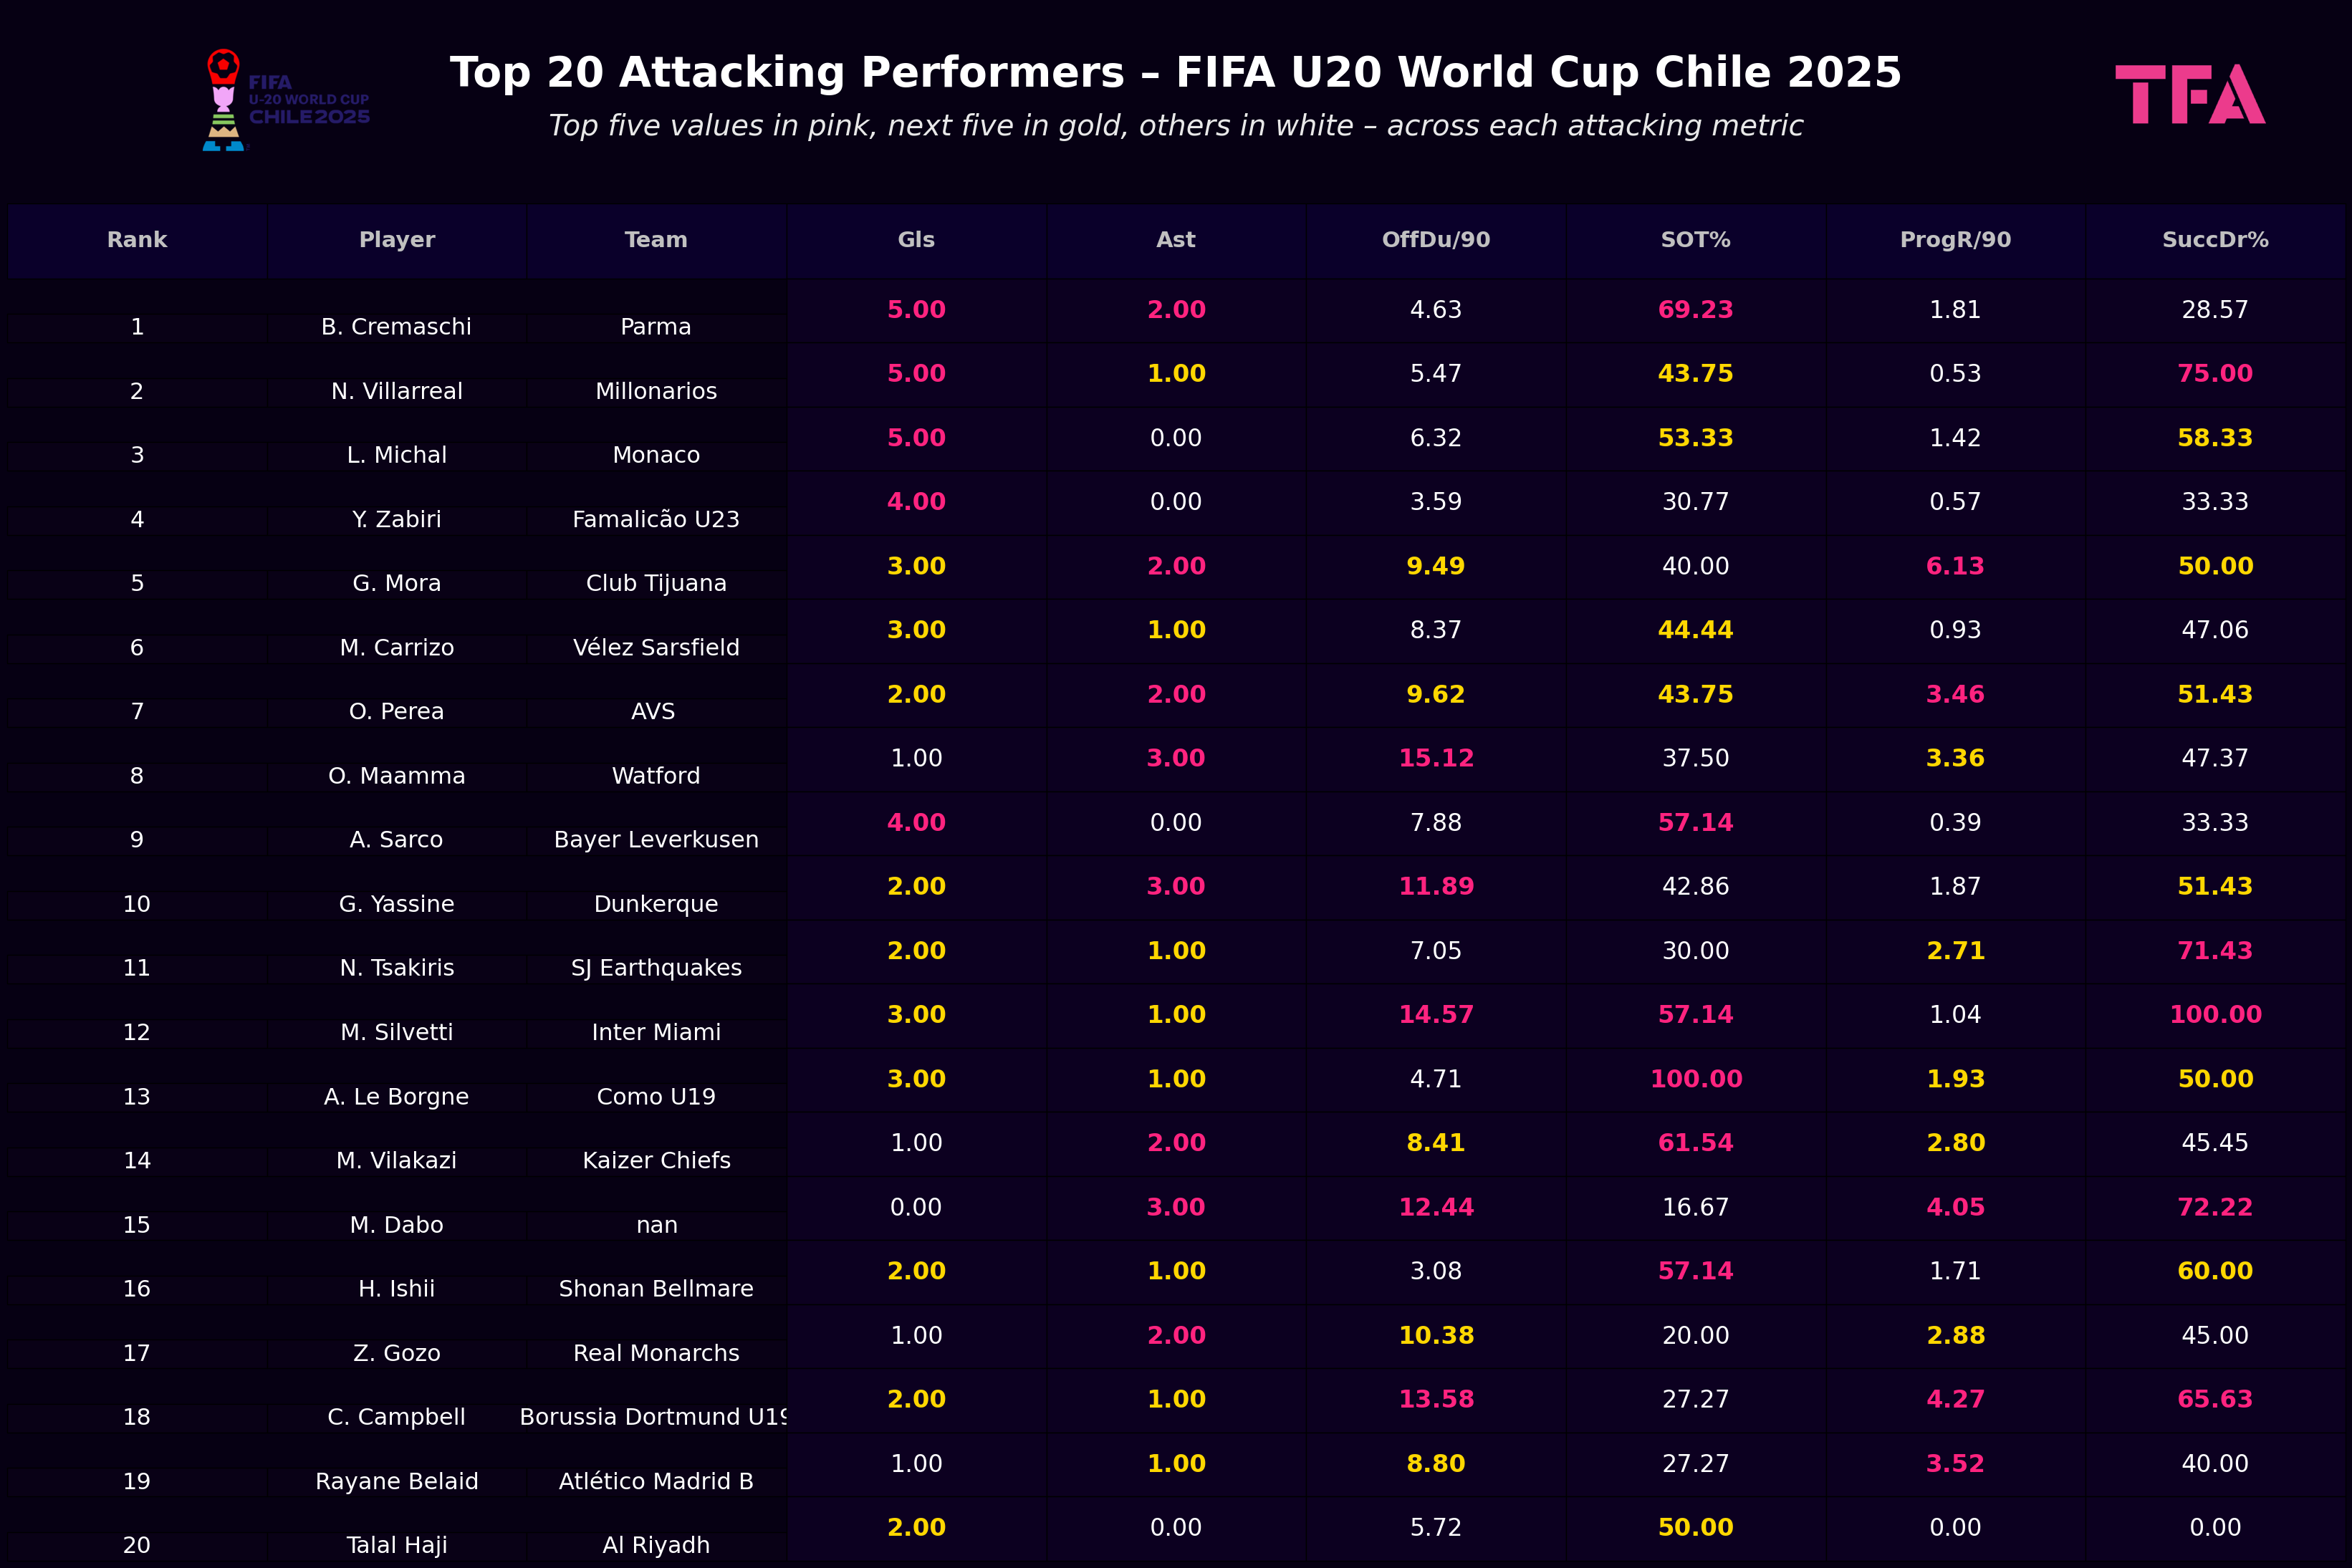

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
from PIL import Image

att_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\3- U20 WC attacking stats.xlsx"
gen_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\1- U20 WC general stats.xlsx"

df_att = pd.read_excel(att_path)
df_gen = pd.read_excel(gen_path)

df = pd.merge(df_att, df_gen[["Player", "Birth country"]], on="Player", how="left")
df["Birth country"] = df["Birth country"].fillna("Unknown")

df["Total Score"] = df["Goals"] + df["Assists"] + df["xA"] + df["xG"]
df_top = df.sort_values(by=["Total Score", "Matches played"], ascending=False).head(20)

cols = [
    "Goals",
    "Assists",
    "Offensive duels per 90",
    "Shots on target, %",
    "Progressive runs per 90",
    "Successful dribbles, %"
]

col_short = {
    "Goals": "Gls",
    "Assists": "Ast",
    "Offensive duels per 90": "OffDu/90",
    "Shots on target, %": "SOT%",
    "Progressive runs per 90": "ProgR/90",
    "Successful dribbles, %": "SuccDr%"
}

fig, ax = plt.subplots(figsize=(20, 13))
fig.patch.set_facecolor("#060013")
ax.set_facecolor("#090116")
ax.axis("off")

headers = ["Rank", "Player", "Team"] + [col_short[c] for c in cols]
table_data = []

for i, (_, row) in enumerate(df_top.iterrows(), start=1):
    row_data = [i, row["Player"], row["Team"]] + [f"{row[c]:.2f}" for c in cols]
    table_data.append(row_data)

table = ax.table(cellText=table_data, colLabels=headers, loc="center", cellLoc="center", colColours=["#1A0033"] * len(headers))
table.auto_set_font_size(False)
table.set_fontsize(22)
table.scale(1.7, 2.3)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(color="#C0C0C0", fontweight="bold", ha='center')
        cell.set_facecolor("#0A002A")
        cell.set_height(0.1)
    elif col in [0, 1, 2]:
        cell.set_facecolor("#090116")
        cell.set_text_props(color="white", fontsize=23)
    else:
        try:
            col_name = cols[col - 3]
            values_sorted = df_top[col_name].sort_values(ascending=False).reset_index(drop=True)
            val = float(cell.get_text().get_text())
            if val in values_sorted[:5].values:
                cell.set_text_props(color="#FF237F", fontweight="bold", fontsize=24.5)
            elif val in values_sorted[5:10].values:
                cell.set_text_props(color="#FFD700", fontweight="bold", fontsize=24.5)
            else:
                cell.set_text_props(color="white", fontsize=24)
            cell.set_facecolor("#0C0020")
            cell.set_height(0.085)
        except:
            cell.set_facecolor("#090116")

plt.subplots_adjust(left=0.02, right=0.98, top=0.86, bottom=0.05)

plt.suptitle(" \nTop 20 Attacking Performers – FIFA U20 World Cup Chile 2025", color='white', fontsize=42, weight='bold', y=1.395)
plt.text(0.5, 1.266, "Top five values in pink, next five in gold, others in white – across each attacking metric",
         ha='center', va='center', transform=fig.transFigure, color='#E8E8E8', fontsize=29, style='italic')

fifa_logo_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\Main Files\fifa-u-20-world-cup-chile-2025-logo.png"
if os.path.exists(fifa_logo_path):
    fifa_img = Image.open(fifa_logo_path).convert("RGBA")
    fifa_img = fifa_img.resize((int(fifa_img.width * 0.81), int(fifa_img.height * 0.81)))
    fig.figimage(fifa_img, xo=270, yo=1920, alpha=0.98, zorder=10)

tfa_logo_path = r"D:\Work\Data Analysis TFA\06 How Ancelotti Could Reshape Brazil\logos\TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path).convert("RGBA")
    tfa_img = tfa_img.resize((int(tfa_img.width * 0.69), int(tfa_img.height * 0.69)))
    fig.figimage(tfa_img, xo=2920, yo=1920, alpha=0.97, zorder=10)

plt.show()

The key passes stats for top 20 players at FIFA U20 World Cup Chile 2025

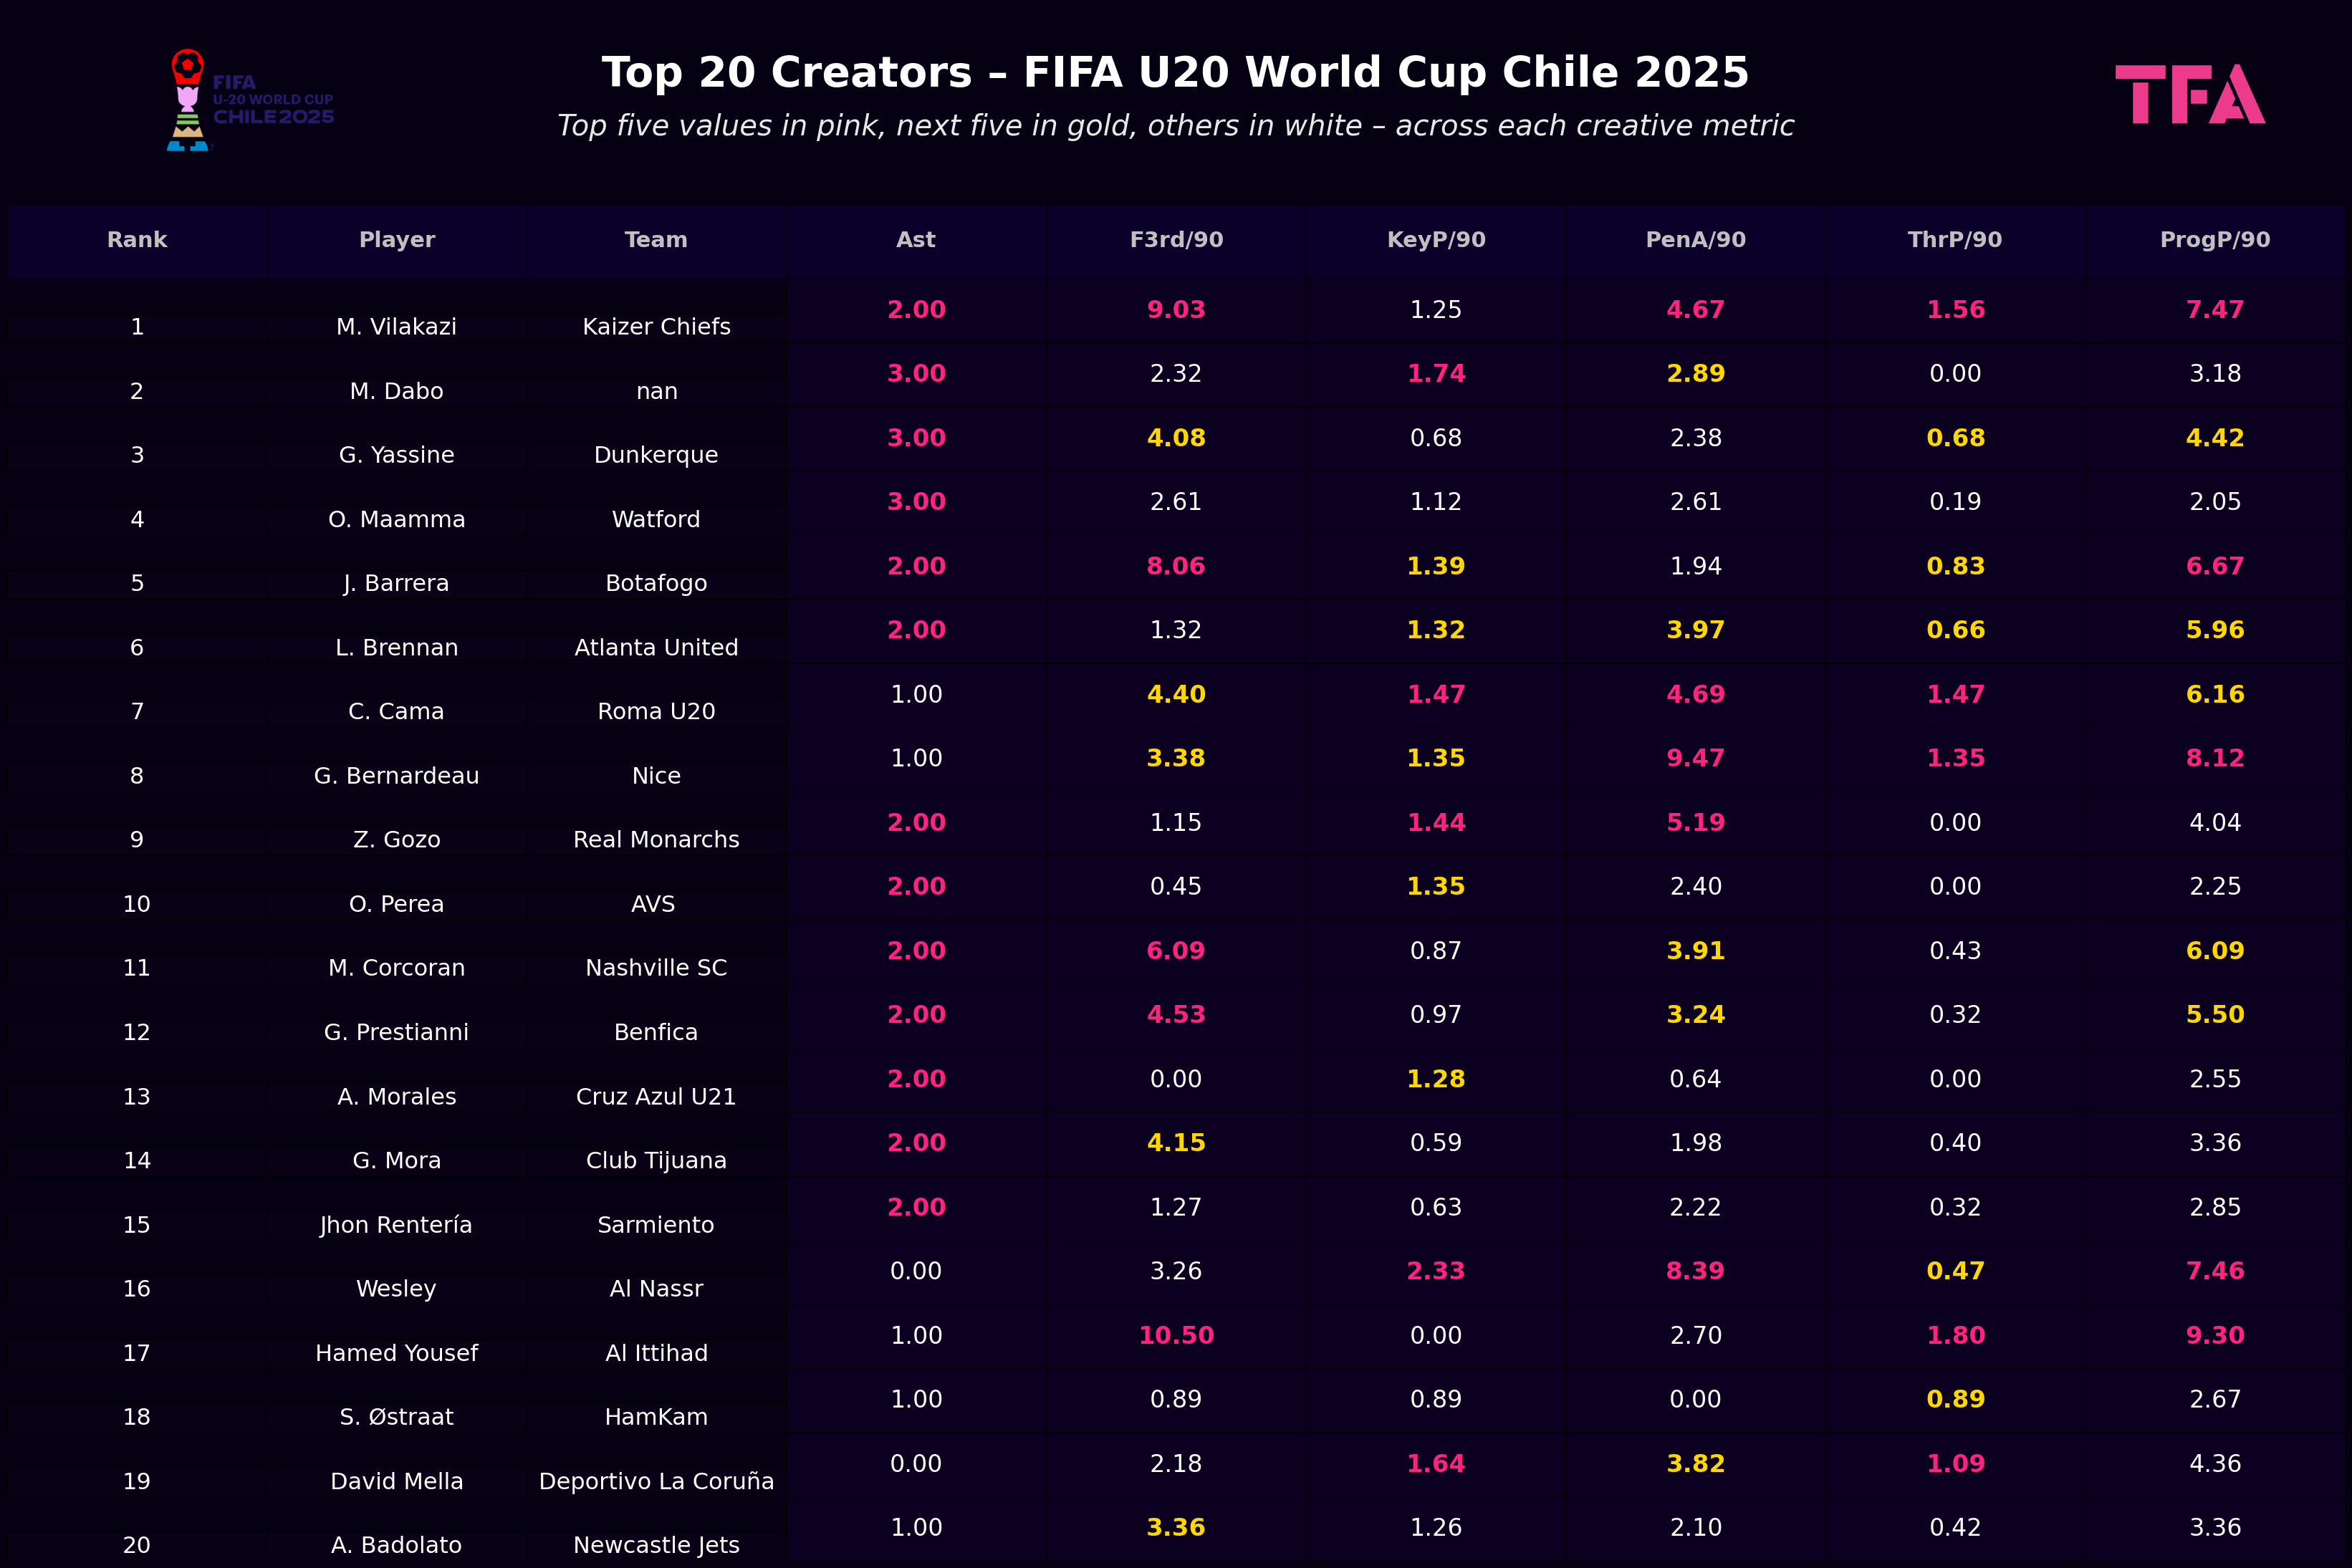

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\5- U20 WC key passes stats.xlsx"
df = pd.read_excel(path)

df["Total Score"] = df["Assists"] + df["Key passes per 90"] + df["Through passes per 90"]
df_top = df.sort_values(by=["Total Score", "Matches played"], ascending=False).head(20)

cols = [
    "Assists",
    "Passes to final third per 90",
    "Key passes per 90",
    "Passes to penalty area per 90",
    "Through passes per 90",
    "Progressive passes per 90"
]

col_short = {
    "Assists": "Ast",
    "Passes to final third per 90": "F3rd/90",
    "Key passes per 90": "KeyP/90",
    "Passes to penalty area per 90": "PenA/90",
    "Through passes per 90": "ThrP/90",
    "Progressive passes per 90": "ProgP/90"
}

fig, ax = plt.subplots(figsize=(20, 13))
fig.patch.set_facecolor("#060013")
ax.set_facecolor("#090116")
ax.axis("off")

headers = ["Rank", "Player", "Team"] + [col_short[c] for c in cols]
table_data = []

for i, (_, row) in enumerate(df_top.iterrows(), start=1):
    row_data = [i, row["Player"], row["Team"]] + [f"{row[c]:.2f}" for c in cols]
    table_data.append(row_data)

table = ax.table(cellText=table_data, colLabels=headers, loc="center", cellLoc="center", colColours=["#1A0033"] * len(headers))
table.auto_set_font_size(False)
table.set_fontsize(22)
table.scale(1.7, 2.3)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(color="#C0C0C0", fontweight="bold", ha='center')
        cell.set_facecolor("#0A002A")
        cell.set_height(0.1)
    elif col in [0, 1, 2]:
        cell.set_facecolor("#090116")
        cell.set_text_props(color="white", fontsize=23)
    else:
        try:
            col_name = cols[col - 3]
            values_sorted = df_top[col_name].sort_values(ascending=False).reset_index(drop=True)
            val = float(cell.get_text().get_text())
            if val in values_sorted[:5].values:
                cell.set_text_props(color="#FF237F", fontweight="bold", fontsize=24.5)
            elif val in values_sorted[5:10].values:
                cell.set_text_props(color="#FFD700", fontweight="bold", fontsize=24.5)
            else:
                cell.set_text_props(color="white", fontsize=24)
            cell.set_facecolor("#0C0020")
            cell.set_height(0.085)
        except:
            cell.set_facecolor("#090116")

plt.subplots_adjust(left=0.02, right=0.98, top=0.86, bottom=0.05)

plt.suptitle(" \nTop 20 Creators – FIFA U20 World Cup Chile 2025", color='white', fontsize=42, weight='bold', y=1.395)
plt.text(0.5, 1.266, "Top five values in pink, next five in gold, others in white – across each creative metric",
         ha='center', va='center', transform=fig.transFigure, color='#E8E8E8', fontsize=29, style='italic')

fifa_logo_path = r"D:\Work\Data Analysis TFA\31 World Cup U20 data analysis\Main Files\fifa-u-20-world-cup-chile-2025-logo.png"
if os.path.exists(fifa_logo_path):
    fifa_img = Image.open(fifa_logo_path).convert("RGBA")
    fifa_img = fifa_img.resize((int(fifa_img.width * 0.81), int(fifa_img.height * 0.81)))
    fig.figimage(fifa_img, xo=220, yo=1920, alpha=0.98, zorder=10)

tfa_logo_path = r"D:\Work\Data Analysis TFA\06 How Ancelotti Could Reshape Brazil\logos\TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path).convert("RGBA")
    tfa_img = tfa_img.resize((int(tfa_img.width * 0.69), int(tfa_img.height * 0.69)))
    fig.figimage(tfa_img, xo=2920, yo=1920, alpha=0.97, zorder=10)

plt.show()